# Cluster analysis of SDMoA paintings

## Importing stuff

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import cycle #for plotting clusters
import seaborn as sns
sns.set()
from sklearn.cluster import AffinityPropagation
from sklearn.manifold import TSNE 

In [2]:
#import matrix of average emotion scores for each painting as a pandas df
aveEmotions = pd.read_csv("aveEmotion.csv");

In [3]:
#optional - view aveEmotions df
aveEmotions.head(10)
#aveEmotions

,ID,Moved,Fascinated,Funny,Surprised,Indifferent,Calm,Unsettled,Personal,Curious
0,1001,-0.141070,0.74282,-0.829100,0.114420,-0.21236,0.313680,-0.47097,0.143760,0.338840
1,1002,-0.225820,0.23785,-0.022247,0.082065,0.16403,0.646690,-0.60968,-0.213770,-0.059109
2,1003,0.002834,0.44047,-0.869410,0.048535,-0.10546,0.591430,-0.46635,0.244830,0.113120
3,1004,0.469020,0.50615,-0.965970,-0.254480,-0.42721,1.121600,-0.77288,0.054223,0.269500
4,1005,-0.801470,0.49610,0.326050,0.237830,0.14185,0.033303,-0.11804,-0.681290,0.365660
5,1006,-0.257770,0.29422,-0.488710,0.042017,0.65161,0.414210,-0.18297,-0.494200,0.021600
6,1007,0.164830,0.58449,-0.959410,0.182500,-0.37999,0.876280,-0.75691,0.123170,0.165040
7,1008,-0.033978,0.63842,-0.781480,0.086446,0.44838,0.271120,-0.23298,-0.495670,0.099748
8,1009,0.004992,0.73277,-0.743760,-0.008288,-0.86954,0.553040,-0.30165,0.110040,0.522400
9,1010,0.254780,0.90964,-0.763770,-0.090928,-0.43831,0.192880,-0.76366,0.323900,0.375470


## Clustering time!

In [4]:
#create aveEmotions copy without ID column to be used for clustering
X = aveEmotions.to_numpy()
X = np.delete(X, 0, axis=1) 

In [5]:
#algorithms to be used

af = AffinityPropagation()
tsne = TSNE(n_components=2, perplexity = 20, random_state = 0)

### Clustering after (this is what I originally had, and where the graphs I send came from)

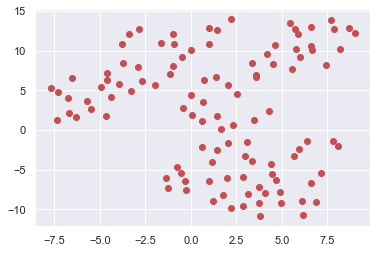

In [6]:
# tSNE performed on aveEmotions data

X_tsned = tsne.fit_transform(X)
# I set perplexity to 20, which is kind of an arbitrary number, since I think that's around the average number of 
# paintings in each gallery

tsned = plt.scatter(X_tsned[:,0],X_tsned[:,1],c='r')
plt.show()

In [7]:
#Cluster! That! Data!
clustering = af.fit(X_tsned) 

cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

In [8]:
print(cluster_centers_indices)
print(labels)
print(n_clusters_)

[  7  16  64  68  74  82 103 106]
[7 4 6 2 1 4 6 0 6 6 5 2 1 3 3 3 1 1 6 1 3 5 3 0 1 3 3 3 1 1 4 4 1 1 0 3 7
 1 0 1 4 3 0 4 7 4 0 5 4 4 4 3 0 1 4 0 5 6 2 5 3 5 5 4 2 4 0 2 3 7 0 2 6 2
 4 3 3 6 6 5 0 2 5 7 7 3 6 3 0 4 7 1 7 2 2 2 7 6 2 5 4 2 7 6 2 5 7 3 6]
8


In [30]:
#adding labels to a new aveEmotions df
aveEmotions['ClusterAfter'] = labels
aveEmotions['ClusterBefore'] = np.nan #this is empty for now so certain functions Work
aveEmotions

,ID,Moved,Fascinated,Funny,Surprised,Indifferent,Calm,Unsettled,Personal,Curious,ClusterAfter,ClusterBefore
0,1001,-0.141070,0.74282,-0.829100,0.114420,-0.212360,0.313680,-0.47097,0.143760,0.338840,7,NaN
1,1002,-0.225820,0.23785,-0.022247,0.082065,0.164030,0.646690,-0.60968,-0.213770,-0.059109,4,NaN
2,1003,0.002834,0.44047,-0.869410,0.048535,-0.105460,0.591430,-0.46635,0.244830,0.113120,6,NaN
3,1004,0.469020,0.50615,-0.965970,-0.254480,-0.427210,1.121600,-0.77288,0.054223,0.269500,2,NaN
4,1005,-0.801470,0.49610,0.326050,0.237830,0.141850,0.033303,-0.11804,-0.681290,0.365660,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
104,20002,0.268710,0.69223,-0.837550,-0.280190,-0.208180,1.086400,-0.75728,-0.105310,0.141120,2,NaN
105,20003,0.179030,0.69808,-0.860060,-0.145850,-0.110280,1.014800,-0.79596,-0.151580,0.171810,5,NaN
106,20004,0.096897,0.75745,-0.714240,0.105690,0.026286,0.355050,-0.52702,-0.345190,0.245070,7,NaN
107,20005,0.166650,0.77236,-0.985160,0.302010,-0.514550,-0.049244,0.19294,-0.355450,0.470440,3,NaN


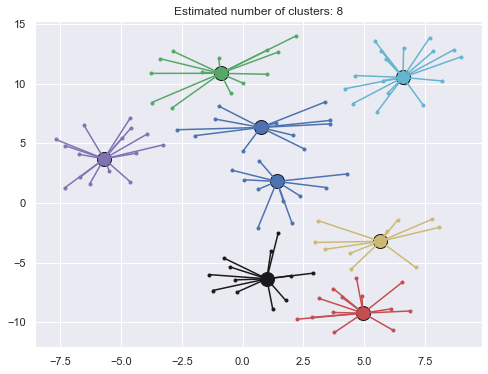

In [12]:
# from sklearn's demo of affinity propogation

plt.close('all')
plt.figure(figsize=(8, 6))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_tsned[cluster_centers_indices[k]]
    plt.plot(X_tsned[class_members, 0], X_tsned[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, 
             markeredgecolor='k', markersize=14)
    for x in X_tsned[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [13]:
# function to get a table of the amount of paintings in each cluster

#whichCluster is a string
def amountInCluster(whichCluster,numClusters):
    clusterList = list(range(0,numClusters,1))
    clusterAmount = list(range(0,numClusters,1))

    for i in range(0,numClusters):
        clusterAmount[i] = aveEmotions[whichCluster][(aveEmotions[whichCluster] == i)].count()
    
    clusterDict = {'Cluster': clusterList, 'numItems': clusterAmount}
    clusterAmounts = pd.DataFrame.from_dict(clusterDict)
    
    return clusterAmounts

In [14]:
clusterCountAfter = amountInCluster('ClusterAfter',n_clusters_)
clusterCountAfter

,Cluster,numItems
0,0,12
1,1,14
2,2,14
3,3,18
4,4,16
5,5,11
6,6,13
7,7,11


In [31]:
# function to get col means for each cluster

#whichCluster is a str
def addColAverage(whichCluster,clusterNum):  
    cluster = aveEmotions[(aveEmotions[whichCluster] == clusterNum)] #grabs paintings in a cluster
    means = cluster.mean() #col means
    means = means.drop(labels = ["ID","ClusterAfter","ClusterBefore"]) #drop IDs and Cluster labels
    means = means.to_numpy() #converts series to numpy array
    
    return means

In [35]:
#this will be the x vals for plotting
ratings = np.array([1,2,3,4,5,6,7,8,9])

#this checks to make sure addColAverage works
#print(addColAverage("ClusterAfter",0))

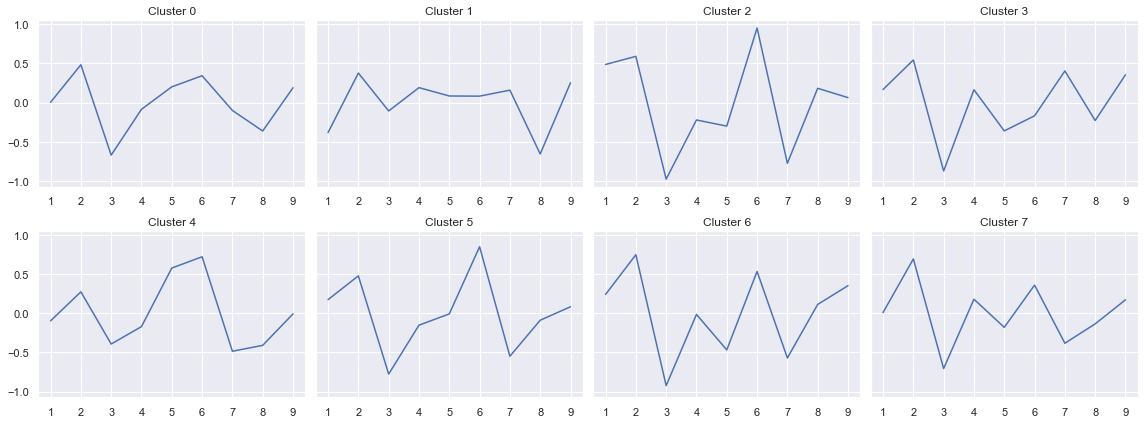

In [34]:
# plot the emotion averages of each cluster

fig, axes= plt.subplots(nrows=2, ncols=4, sharey = True, figsize=(16,6))

plt.setp(axes, xticks=[1,2,3,4,5,6,7,8,9]) #, xticklabels=["Moved","Fascin","Funny","Surprised",
                                                        #"Indiff","Calm","Unset","Personal","Curious"]) #adds tick marks for each emotion category
k = 0
for i in range(0,2):
    for j in range(0,4):
        axes[i,j].plot(ratings, addColAverage("ClusterAfter",k))
        axes[i,j].set_title('Cluster {number}'.format(number = k))
        k = k+1

plt.tight_layout()

plt.show()


### Clustering First

In [36]:
#fitting X instead of transformed X_tsned
clustering2 = af.fit(X) 

cluster_centers_indices2 = af.cluster_centers_indices_
labels2 = af.labels_
n_clusters_2 = len(cluster_centers_indices2)

aveEmotions['ClusterBefore'] = labels2

In [37]:
aveEmotions

,ID,Moved,Fascinated,Funny,Surprised,Indifferent,Calm,Unsettled,Personal,Curious,ClusterAfter,ClusterBefore
0,1001,-0.141070,0.74282,-0.829100,0.114420,-0.212360,0.313680,-0.47097,0.143760,0.338840,7,10
1,1002,-0.225820,0.23785,-0.022247,0.082065,0.164030,0.646690,-0.60968,-0.213770,-0.059109,4,2
2,1003,0.002834,0.44047,-0.869410,0.048535,-0.105460,0.591430,-0.46635,0.244830,0.113120,6,9
3,1004,0.469020,0.50615,-0.965970,-0.254480,-0.427210,1.121600,-0.77288,0.054223,0.269500,2,7
4,1005,-0.801470,0.49610,0.326050,0.237830,0.141850,0.033303,-0.11804,-0.681290,0.365660,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
104,20002,0.268710,0.69223,-0.837550,-0.280190,-0.208180,1.086400,-0.75728,-0.105310,0.141120,2,7
105,20003,0.179030,0.69808,-0.860060,-0.145850,-0.110280,1.014800,-0.79596,-0.151580,0.171810,5,9
106,20004,0.096897,0.75745,-0.714240,0.105690,0.026286,0.355050,-0.52702,-0.345190,0.245070,7,10
107,20005,0.166650,0.77236,-0.985160,0.302010,-0.514550,-0.049244,0.19294,-0.355450,0.470440,3,12


In [38]:
print(cluster_centers_indices2)
print(labels2)
print(n_clusters_2)

[ 16  22  30  33  41  50  57  64  70  72  83  91 107]
[10  2  9  7  0  5  9  8  6  9  5  7 11  1  1 12  0  0  9  0  8  5  1  8
  3  8 12  1  2 11  2  2  3  3  2 12 10  0  8  0  2  4  2  2 12  5  8  5
  5  5  5  4  8  0  5  8 10  6  7  7  1 10  9  5  7  5  8  9  1 10  8  7
  9  6  5 12  4  9  6  6  5  7  7 10 10 12  9 12  8  2 10 11 10  9  7  9
  6  6  7  7  2  7  9  9  7  9 10 12  6]
13


I'm not sure I'm doing what you want me to do here...I'm trying to use the transformed data (which should be the same as it was above) to plot the clusters you get when considering all 9 dimensions. The cluster look a little weird, though.

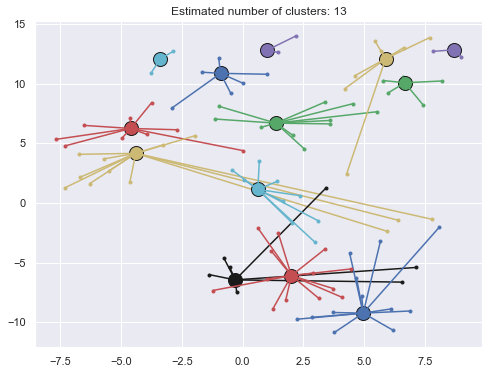

In [39]:
# using X_tsned (transformed data) instead of X

plt.close('all')
plt.figure(figsize=(8, 6))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_2), colors):
    class_members = labels2 == k
    cluster_center = X_tsned[cluster_centers_indices2[k]]
    plt.plot(X_tsned[class_members, 0], X_tsned[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X_tsned[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_2)
plt.show()

In [40]:
clusterCountBefore = amountInCluster('ClusterBefore',n_clusters_2)
clusterCountBefore

,Cluster,numItems
0,0,7
1,1,6
2,2,10
3,3,3
4,4,3
5,5,13
6,6,8
7,7,13
8,8,11
9,9,14


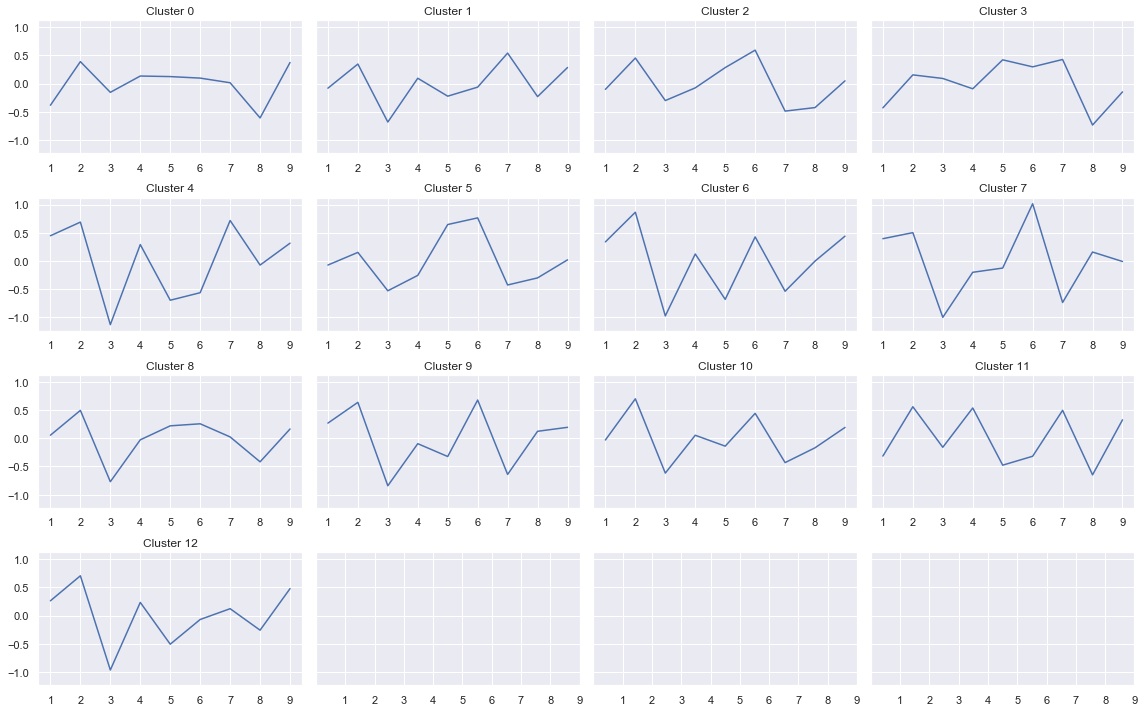

In [41]:
# plot the emotion averages of each cluster

fig, axes= plt.subplots(nrows=4, ncols=4, sharey = True, figsize=(16,10))

plt.setp(axes, xticks=[1,2,3,4,5,6,7,8,9]) #, xticklabels=["Moved","Fascin","Funny","Surprised",
                                                        #"Indiff","Calm","Unset","Personal","Curious"]) #adds tick marks for each emotion category
k = 0
for i in range(0,4):
    for j in range(0,4):
        if k<13:
            axes[i,j].plot(ratings, addColAverage("ClusterBefore",k))
            axes[i,j].set_title('Cluster {number}'.format(number = k))
            k = k+1

plt.tight_layout()

plt.show()

13 clusters might be a lot, and some of them look pretty similar, so perhaps we could combine them to make larger groups? This was something Ying suggested. 

From looking at the graphs, it seems that there is the most similarity between
- 1 & 4
- 0 & 8
- 2 & 5
- 6 & 7 & 9 & 10 
- 11 & 12

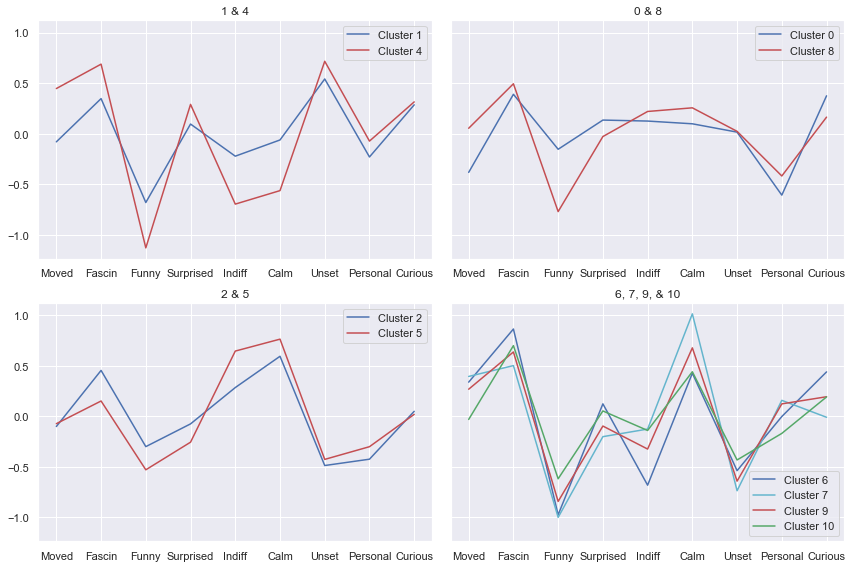

In [42]:
# Clusters 1 & 4

fig, axes= plt.subplots(nrows=2, ncols=2, sharey = True, figsize=(12,8))

plt.setp(axes, xticks=[1,2,3,4,5,6,7,8,9], xticklabels=["Moved","Fascin","Funny","Surprised",
                                                        "Indiff","Calm","Unset","Personal","Curious"]) #adds tick marks for each emotion category

axes[0,0].plot(ratings, addColAverage("ClusterBefore",1), c='b',label="Cluster 1")
axes[0,0].plot(ratings, addColAverage("ClusterBefore",4), c='r',label="Cluster 4")
axes[0,0].set_title('1 & 4')
axes[0,0].legend(loc=0)

axes[0,1].plot(ratings, addColAverage("ClusterBefore",0), c='b',label="Cluster 0")
axes[0,1].plot(ratings, addColAverage("ClusterBefore",8), c='r',label="Cluster 8")
axes[0,1].set_title('0 & 8')
axes[0,1].legend(loc=0)

axes[1,0].plot(ratings, addColAverage("ClusterBefore",2), c='b',label="Cluster 2")
axes[1,0].plot(ratings, addColAverage("ClusterBefore",5), c='r',label="Cluster 5")
axes[1,0].set_title('2 & 5')
axes[1,0].legend(loc=0)

axes[1,1].plot(ratings, addColAverage("ClusterBefore",6), c='b',label="Cluster 6")
axes[1,1].plot(ratings, addColAverage("ClusterBefore",7), c='c',label="Cluster 7")
axes[1,1].plot(ratings, addColAverage("ClusterBefore",9), c='r',label="Cluster 9")
axes[1,1].plot(ratings, addColAverage("ClusterBefore",10), c='g',label="Cluster 10")
#axes[1,1].plot(ratings, cluster12, c='y',label="Cluster 12")
axes[1,1].set_title('6, 7, 9, & 10')
axes[1,1].legend(loc=0)

plt.tight_layout()

plt.show()

However, these graphs look similar to some of the ones in the clusters formed after tSNE. (2&5 are similar to Cluster 4, 1&4 are similar to Cluster 3, 0&8 are similar to Cluster 0, maybe Cluster 1, etc.)

What are your thoughts?